In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

%matplotlib inline


In [4]:
df = pd.read_csv('/Users/matt/Desktop/heart/heart.csv')

In [8]:
df.columns # looking at the attributes

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.head() # looking at the first five samples from the data set

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [10]:
# Now I will look on each attribute to find some potential invalid values.
df.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
38     3
71     3
37     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64

In [11]:
df.sex.value_counts() # 1 = male, 0 = female

1    207
0     96
Name: sex, dtype: int64

In [12]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [13]:
df.trestbps.value_counts() # resting blood pressure in mmHg (assuming it is systolic)

# According to https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings,
#I can claim that these values seem reasonable despite the fact that some of them are high.

120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
108     6
135     6
124     6
152     5
145     5
134     5
100     4
122     4
170     4
126     3
115     3
105     3
136     3
180     3
142     3
146     2
148     2
178     2
94      2
144     2
102     2
129     1
192     1
101     1
174     1
172     1
104     1
165     1
164     1
106     1
156     1
155     1
154     1
114     1
117     1
123     1
200     1
Name: trestbps, dtype: int64

In [14]:
df.chol.value_counts() # serum cholesterol in mg/dL

204    6
197    6
234    6
269    5
212    5
      ..
215    1
210    1
200    1
195    1
417    1
Name: chol, Length: 152, dtype: int64

In [15]:
df.fbs.value_counts() # if fasting blood sugar > 120 mg/dL (1 = true, 0 = false).

# According to the sources, normal blood sugar level is less than 100 mg/dL. Then from 100 up to 125 mg/dL, there is
# a prediabetetes stage. If fasting blood sugar is greater than 126 mg/dL, then a patient has a diabetis.

# Sources:
# 1. https://www.webmd.com/diabetes/how-sugar-affects-diabetes
# 2. https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451
# 3. https://www.diabetes.co.uk/diabetes_care/fasting-blood-sugar-levels.html

0    258
1     45
Name: fbs, dtype: int64

In [16]:
df.restecg.value_counts() # resting electrocardographic results.

1    152
0    147
2      4
Name: restecg, dtype: int64

In [17]:
df.thalach.value_counts() # maximum heart rate achieved in beats per minute.

# Based on https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates, the maximum heart rate
# can be estimated as 220 subtracted by your age. This is going to be useful in the next stage of data validation. 


162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

In [18]:
df.exang.value_counts() # exercise induced angina, 1 = true, 0 = false.

0    204
1     99
Name: exang, dtype: int64

In [19]:
df.oldpeak.value_counts() # ST depression induced by exercise relative to rest.

# The typical ST segment duration is usually around 0.08 sec (80 ms).

0.0    99
1.2    17
1.0    14
0.6    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.6     6
2.8     6
1.9     5
0.5     5
1.5     5
3.0     5
2.2     4
3.6     4
0.3     3
2.4     3
0.9     3
4.0     3
3.4     3
2.3     2
1.1     2
4.2     2
3.2     2
2.5     2
3.5     1
1.3     1
3.8     1
6.2     1
5.6     1
3.1     1
2.9     1
4.4     1
0.7     1
2.1     1
Name: oldpeak, dtype: int64

In [23]:
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [20]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [253]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='thalach'>

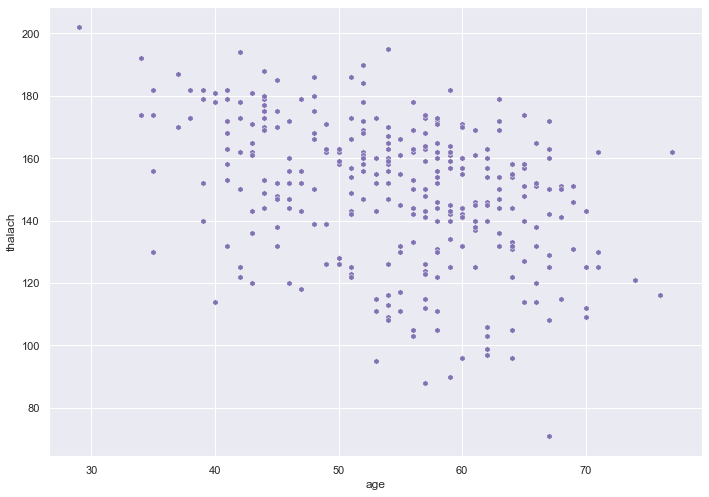

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='age', y='thalach', data=df, color='m', marker='h')

In [25]:
sus = df[df['thalach'] < 80]
sus

# https://www.healthline.com/health/athlete-heart-rate
# https://uihc.org/health-topics/target-heart-rate-exercise

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [ ]:
sns.boxplot(x='target', y='chol', data=df)

<AxesSubplot:xlabel='target', ylabel='trestbps'>

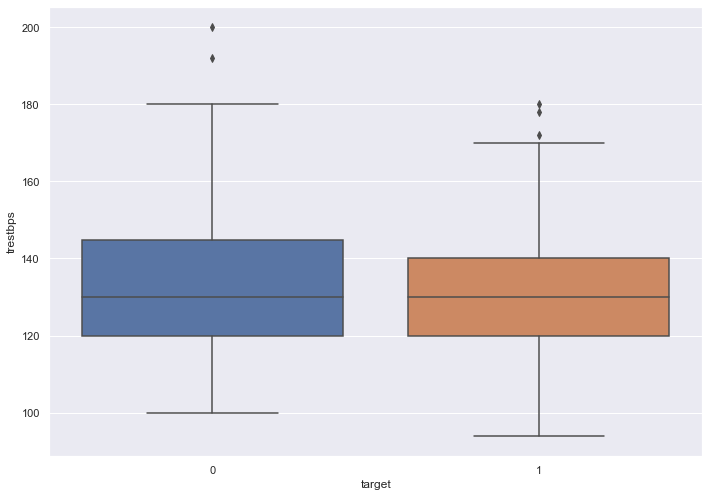

In [35]:
sns.boxplot(x='target', y='trestbps', data=df)

<AxesSubplot:xlabel='cp', ylabel='trestbps'>

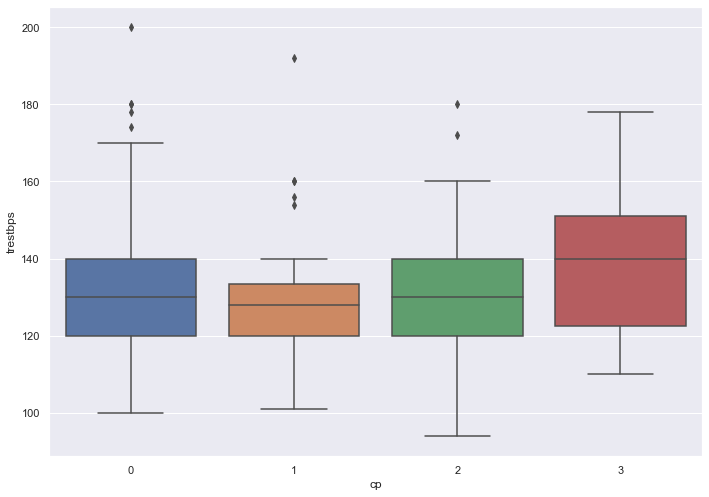

In [36]:
sns.boxplot(x='cp', y='trestbps', data=df)

<AxesSubplot:xlabel='target', ylabel='oldpeak'>

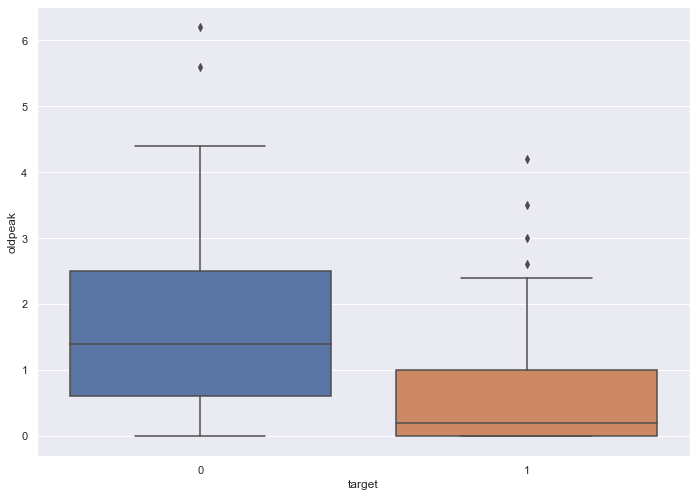

In [38]:
sns.boxplot(x='target', y='oldpeak', data=df)

<AxesSubplot:xlabel='target', ylabel='cp'>

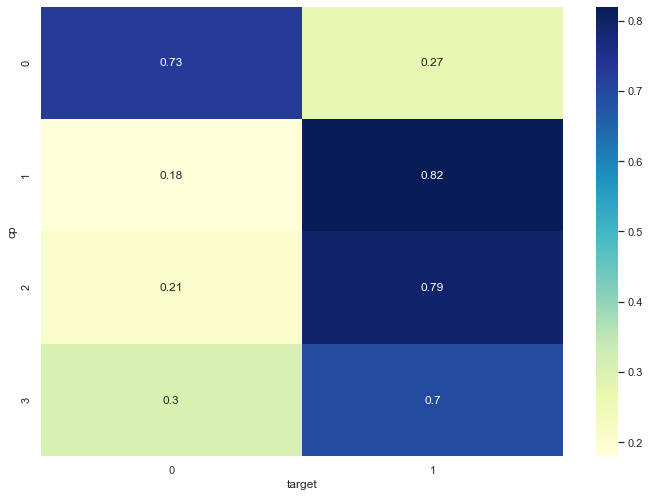

In [41]:
contigency = pd.crosstab(df['cp'], df['target'], normalize='index')
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [43]:
c, p, dof, expected = chi2_contingency(contigency)

In [44]:
p # which means we don't reject the null hypothesis. This leads to that chest pain and target are independent
  # to each-other.

0.8383412544855614

In [5]:
corr = df.corr()

Text(0.5, 0.9, 'Correlation heatmap')

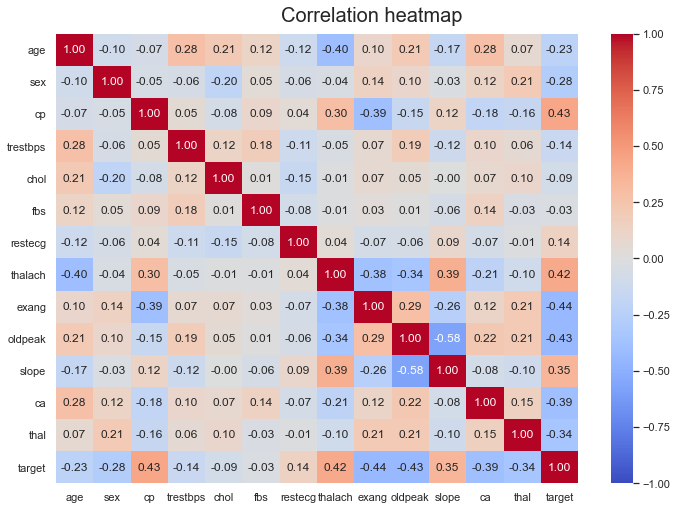

In [19]:
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, center=0, annot=True, fmt='.2f')
plt.figtext(.5,.9,'Correlation heatmap', fontsize=20, ha='center')

In [22]:
contigency_heartrate = pd.crosstab(df['thalach'], df['cp'])
c, p, dof, expected = chi2_contingency(contigency_heartrate)
p # Thus, I cannot reject the null hypothesis witha 5% significance level. However, the p value is close to reach this
  # point. Therefore, if dimension reduction needed, I would remove one of these variables from models.

0.06415044974866406

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


In [344]:
X_test, X_train, y_test, y_train = train_test_split(df[['cp', 'oldpeak', 'ca']], df['target'], test_size=0.2)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [345]:
# SVM
svm = SVC(kernel='linear', C=3.0)
svm.fit(X_train_std, y_train)


SVC(C=3.0, kernel='linear')

In [346]:
y_predict_svm = svm.predict(X_test_std)

In [347]:
svm.score(X_test_std, y_test) # max so far = 0.8057851239669421, 0.8305785123966942 without thalach

0.78099173553719

In [348]:
svm.score(X_train_std, y_train)

0.7377049180327869

In [349]:
print(classification_report(y_test, y_predict_svm))

              precision    recall  f1-score   support

           0       0.86      0.63      0.73       112
           1       0.74      0.91      0.82       130

    accuracy                           0.78       242
   macro avg       0.80      0.77      0.77       242
weighted avg       0.79      0.78      0.78       242



In [350]:
knn = KNeighborsClassifier(n_neighbors=7, p=1.3)


In [351]:
knn.fit(X_train_std, y_train)
knn.score(X_test_std, y_test) # max = 81.81%

0.8140495867768595

In [352]:
knn.score(X_train_std, y_train)

0.7377049180327869

In [353]:
y_predict_knn = knn.predict(X_test_std)
print(classification_report(y_test, y_predict_knn))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78       112
           1       0.78      0.92      0.84       130

    accuracy                           0.81       242
   macro avg       0.83      0.81      0.81       242
weighted avg       0.82      0.81      0.81       242



In [357]:
n_svm = 0
n_knn = 0
for i in range(100):
    X_test, X_train, y_test, y_train = train_test_split(df[['cp', 'oldpeak', 'ca']], df['target'], test_size=0.2)
    stdsc = StandardScaler()
    X_train_std = stdsc.fit_transform(X_train)
    X_test_std = stdsc.transform(X_test)
    
    svm.fit(X_train_std, y_train)
    knn.fit(X_train_std, y_train)
    
    if knn.score(X_train_std, y_train) > svm.score(X_train_std, y_train):
        n_knn += 1
        
    elif knn.score(X_train_std, y_train) < svm.score(X_train_std, y_train):
        n_svm += 1
        
print(f"SVM: {n_svm} vs KNN: {n_knn}")

SVM: 23 vs KNN: 57


In [358]:
# Therefore, it seems that for this case, KNN algorithm works better than Support Vector Machine.